<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/Sklearn_VotingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Voting through Logistic Regression, Support Vector Machine, and Decision Tree Classifier to Optimize Clustering


> Semant Jain, PhD semant@gmail.com


### Background

> Ensemble learning uses multiple machine learning models to try to make better predictions on a dataset. An ensemble model works by training different models on a dataset and having each model make predictions individually. The predictions of these models are then combined in the ensemble model to make a final prediction

> **Logistic Regression** is a statisical model that determines the probability of a certain class or event existing in binary terms. This could be interpreted as pass/fail, present/absent, alive/dead, healthy/sick, cat/dog etc. Each object being detected would be assigned a probability between 0 and 1 and their sum adds to 1.

> **Support Vector Machine**, an algorithm widely used for classification objectives, finds a decision boundary (hyperplane) that maximizes the distance between the data points of both classes. The dimension of a hyperplane depends on the number of features. The dimension of the hyperplane depends upon the number of features, e.g., for a two dimensional input, the hyperplane is just a line. For a three dimensional input, the hyperplane is a plane.

> **Decision Tree Classifier**, a predictive model, is used in machine learning, statistics, and data mininig which starts with observations about an item to conclusions about the item's target value. When used as a classification tree, the target variable takes a discrete set of values. As a regression tree, the target variable takes continuous values.


### Summary
> This project demonstrates how an ensemble model combines the votes of constituent models. The constituent models were logistic regression, support vector machines (SVM), and a Decision Tree classifier (DT). Training and testing was done on a toy dataset - Mnist - from the Sklearn library. The following results were observed about the constituent models:
+ Training accuracy ranged from 99.5% to 100.0%
+ Testing accuracy ranged from 85.3% to 98.6%

> When combined into an ensemble, the 
+ Training accuracy was 100.0%
+ Testing accuracy was 97.7%

> If larger datasets were used, the advantages of ensemble voting would be seen in even greater relief.

# 1. Setting Up
### Importing libraries

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier

### Importing data

In [0]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target)

print(x_train.shape, y_train.shape)
print(x_test.shape , y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


# 2. Model

In [0]:
lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', max_iter = 1000)
svm = SVC(kernel = 'poly', degree = 2, gamma = 'auto')
dt = DecisionTreeClassifier()

vc = VotingClassifier(estimators = [('lr', lr), ('svm', svm), ('dt', dt)], voting = 'hard') 

q = []

### Logistic Regression

In [0]:
lr.fit(x_train, y_train)
q.append(lr.score(x_train, y_train))
q.append(lr.score(x_test, y_test))

### Support Vector Machine

In [0]:
svm.fit(x_train, y_train)
q.append(svm.score(x_train, y_train))
q.append(svm.score(x_test, y_test))

### Decision Tree Classifier

In [0]:
dt.fit(x_train, y_train)
q.append(dt.score(x_train, y_train))
q.append(dt.score(x_test, y_test))

### Ensemble Voting Classifier

In [0]:
vc.fit(x_train, y_train)
q.append(vc.score(x_train, y_train))
q.append(vc.score(x_test, y_test))

# 3. Visualization

### Tabular

In [0]:
data = {'Training Accuracy':[q[0], q[2], q[4], q[6]], 'Testing Accuracy':[q[1], q[3], q[5], q[7]]} 
  
df = pd.DataFrame(data, index =['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Voting Classifier']) 
  
df

,Training Accuracy,Testing Accuracy
Logistic Regression,0.994803,0.962222
Support Vector Machine,1.000000,0.982222
Decision Tree,1.000000,0.860000
Voting Classifier,1.000000,0.968889


### Plot

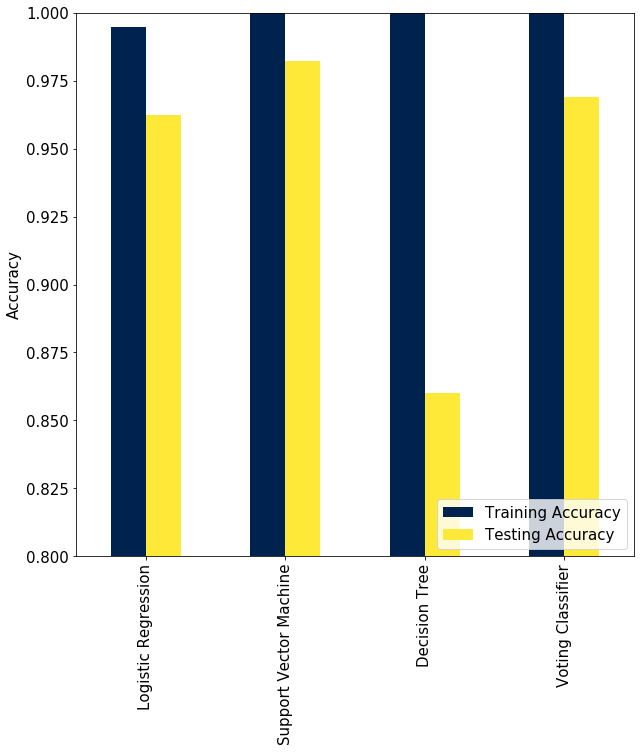

In [0]:
df.plot(figsize=(10,10), kind = "bar", legend = True, colormap = 'cividis')
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend(fontsize = 15, loc='lower right')

plt.savefig("CE_ML_Project_18_04_Results.jpeg")
plt.show()